# Data Analysis Assignment

#### Name List
* Jiayu ZHOU  
* Xiaochen YAN  
* Qinxuan ZHANG  
* Chang WANG  
* Shaobo ZHAO

### 1. Pick a topic that interests you and find a data set

* ** The Topic that Interest me **  

>I want to find out the relationship between **business income** and **the investment into intellectual property products (IPP)** in aggregate level; furthermore, I also think it is worthwhile to investigate whether **the type of business income**, corporate business and noncorporate business, determines something underlying this kind of relationship.

* ** The Database I use **  

>I employ **NIPA database** to abtain the aggragete-level data of USA from 1969 to 2015, specifically, **the income of corporate business in current value, the income of noncorporate business in current value, and the investment into intellectual property products in current value**. Also, I employ the **price index for GDP** to adjust the above three time-series data to get rid of the inflation factor.

### 2. Explore the data using pandas and create at least 3 plots

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('./assignment_data.xlsx')
df.head()

,year,income_cb,income_ncb,inte_invest,price_index,gdp
0,1969,535.1,169.9,17.1,21.691,1019.9
1,1970,550.5,176.2,17.9,22.836,1075.9
2,1971,593.5,187.8,18.6,23.996,1167.8
3,1972,659.7,205.9,20.5,25.035,1282.4
4,1973,738.5,238.3,22.6,26.396,1428.5


###### Adjustment for Inflation

In [35]:
df['income_cb_r']=df['income_cb']/df['price_index']
df['income_ncb_r']=df['income_ncb']/df['price_index']
df['inte_invest_r']=df['inte_invest']/df['price_index']
df['gdp_r']=df['gdp']/df['price_index']
df['income_r'] = df['income_cb_r'] + df['income_ncb_r']
df.head()

,year,income_cb,income_ncb,inte_invest,price_index,gdp,income_cb_r,income_ncb_r,inte_invest_r,gdp_r,income_r
0,1969,535.1,169.9,17.1,21.691,1019.9,24.669218,7.832742,0.788345,47.019501,32.501959
1,1970,550.5,176.2,17.9,22.836,1075.9,24.106674,7.715887,0.783850,47.114206,31.822561
2,1971,593.5,187.8,18.6,23.996,1167.8,24.733289,7.826304,0.775129,48.666444,32.559593
3,1972,659.7,205.9,20.5,25.035,1282.4,26.351108,8.224486,0.818854,51.224286,34.575594
4,1973,738.5,238.3,22.6,26.396,1428.5,27.977724,9.027883,0.856190,54.118048,37.005607


In [36]:
df = df[['year','income_cb_r','income_ncb_r','inte_invest_r','gdp_r','income_r']]
df.head()

,year,income_cb_r,income_ncb_r,inte_invest_r,gdp_r,income_r
0,1969,24.669218,7.832742,0.788345,47.019501,32.501959
1,1970,24.106674,7.715887,0.783850,47.114206,31.822561
2,1971,24.733289,7.826304,0.775129,48.666444,32.559593
3,1972,26.351108,8.224486,0.818854,51.224286,34.575594
4,1973,27.977724,9.027883,0.856190,54.118048,37.005607


###### Dummies for year

In [37]:
dummies = pd.get_dummies(df['year'], drop_first=True)
dummies.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
merged = pd.merge(df, dummies, left_index=True, right_index=True)
merged.tail()

,year,income_cb_r,income_ncb_r,inte_invest_r,gdp_r,income_r,1970,1971,1972,1973,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
42,2011,70.783526,25.470648,5.731985,150.199874,96.254174,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
43,2012,74.109485,26.698346,5.908573,153.538301,100.807831,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
44,2013,75.213483,27.065855,6.059841,156.116427,102.279338,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45,2014,78.258513,27.847811,6.244143,159.807236,106.106323,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46,2015,79.948000,28.922990,6.526423,163.970582,108.870990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


** The reason for WHY year dummies are necessary **  
> With the involvement of year dummies, the macroeconomic environment of each year can be fixed.  
I also include annual GDP for controling the performance of general economy.

###### Plotting the relationship between business income and investment into IPP

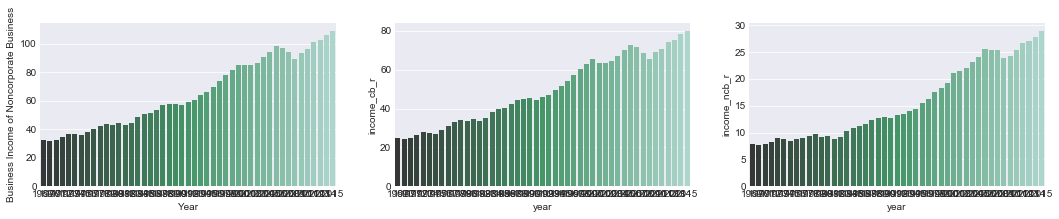

In [82]:
import seaborn as sns
sns.set_style("darkgrid")

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18, 3), sharex=True)
sns.barplot(x=merged['year'], y=merged['income_r'], color='green', palette="BuGn_d",ax=ax1)
ax1.set_ylabel("Business Income")
ax1.set_xlabel("Year")
ax1.set_xticks([1969,1980,1990,2000,2010,2015])
sns.barplot(x=merged['year'], y=merged['income_cb_r'], color='purple', palette="BuGn_d",ax=ax2)
ax1.set_ylabel("Business Income of Corporate Business")
ax1.set_xlabel("Year")
sns.barplot(x=merged['year'], y=merged['income_ncb_r'], color='orange', palette="BuGn_d",ax=ax3)
ax1.set_ylabel("Business Income of Noncorporate Business")
ax1.set_xlabel("Year")
plt.show()

** Comments **  
All of these three kinds of business income perform positively along the time series.

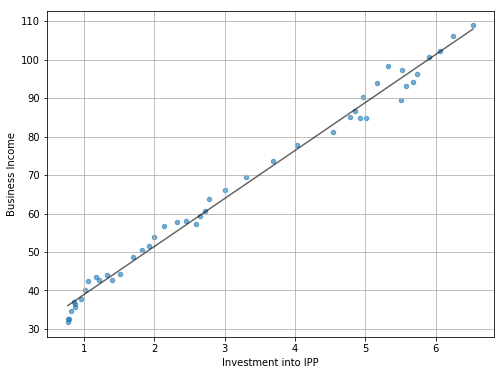

In [39]:
merged.plot(x='inte_invest_r', y='income_r', kind='scatter', alpha=0.6, figsize=(8, 6))
plt.ylabel('Business Income')
plt.xlabel('Investment into IPP')

plt.plot(np.unique(merged['inte_invest_r']),
         np.poly1d(np.polyfit(merged['inte_invest_r'], merged['income_r'], 1))(np.unique(merged['inte_invest_r'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

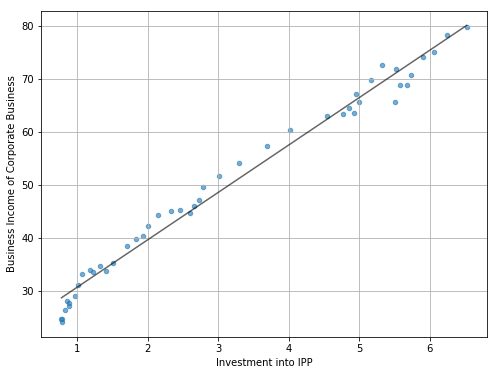

In [40]:
merged.plot(x='inte_invest_r', y='income_cb_r', kind='scatter', alpha=0.6, figsize=(8, 6))
plt.ylabel('Business Income of Corporate Business')
plt.xlabel('Investment into IPP')

plt.plot(np.unique(merged['inte_invest_r']),
         np.poly1d(np.polyfit(merged['inte_invest_r'], merged['income_cb_r'], 1))(np.unique(merged['inte_invest_r'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

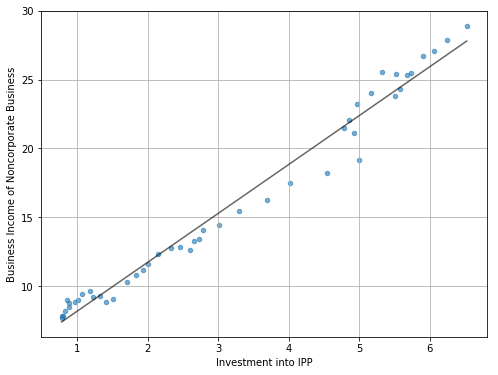

In [41]:
merged.plot(x='inte_invest_r', y='income_ncb_r', kind='scatter', alpha=0.6, figsize=(8, 6))
plt.ylabel('Business Income of Noncorporate Business')
plt.xlabel('Investment into IPP')

plt.plot(np.unique(merged['inte_invest_r']),
         np.poly1d(np.polyfit(merged['inte_invest_r'], merged['income_ncb_r'], 1))(np.unique(merged['inte_invest_r'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

** Comments **  
The above three graphs show **positive correlations** between business income and investment into IPP.

### 3. Develop a hypothesis and test it econometrically

** Hypothesis **  
> According to the above evidence from graphs, it is reasonable to state the hypothesis that investment into IPP contributes a lot for the business income despite the type of business.  

> For accurate analysis, we employ linear regression to quantify the contribution and find out whether or not the relationship is statistically significant.

** Linear Regression Model **  

$$
income_t = \beta_0 + \beta_1 IPP_t + \beta_2 GDP_t + \beta_t Yeardummy_t + u_t \\
$$


** Explanations **  

* $income_t$ have three categories: total income, income of corporate business and income of noncorporate business
* $IPP_t$ stands for the investment into intellectual property products (IPP)
* $GDP_t$ is the control variable for the macroeconomic background
* $Yeardummy_t$ refers to a set of year dummies

** Potential Linear Relation **  
> There is a possiblly linear relation between $IPP_t$ and $GDP_t$.  
> For robustness check, $GDP_t$ is eliminated since we already keep year fixed effects 

In [90]:
import statsmodels.api as sm

merged['constant'] = 1
reg = sm.OLS(endog=merged['income_r'], exog=merged[['inte_invest_r','gdp_r','constant']+ list(dummies.columns)])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               income_r   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sun, 28 Jan 2018   Prob (F-statistic):                nan
Time:                        16:33:43   Log-Likelihood:                 1294.0
No. Observations:                  47   AIC:                            -2494.
Df Residuals:                       0   BIC:                            -2407.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
inte_invest_r     0.5991        inf          0

/Users/princess821/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/princess821/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/princess821/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/princess821/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


** Problems related to the Current Model **  
* It is not feasible to employ year dummies since there is no section difference, which would lead to the input rank is higher than the number of obs, in other words, impossible to solve the parameters. Therefore, we need to employ more aggregate variable to control the macroeconomic environment since year dummies cannot work.  
* Multicollinearity problem is actually existing.

** Another Trying without Year Dummies **  

In [91]:
reg = sm.OLS(endog=merged['income_r'], exog=merged[['inte_invest_r','gdp_r','constant']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               income_r   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6368.
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           6.50e-55
Time:                        16:42:04   Log-Likelihood:                -82.850
No. Observations:                  47   AIC:                             171.7
Df Residuals:                      44   BIC:                             177.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
inte_invest_r     2.1819      1.180      1.848

** Comments **  
>When we exclude year dummies, the results can be solved. However, multicollinearity problem still exists and P-value for the parameter of $IPP_t$ is not significant in 5% significant level.

** Involvement with More Control Variables **  
>We include investment into equipment and structure as control variables considering their contributions to business income with the same treatment as other variables.

In [97]:
df = pd.read_excel('./assignment_data.xlsx')
df['income_cb_r']=df['income_cb']/df['price_index']
df['income_ncb_r']=df['income_ncb']/df['price_index']
df['inte_invest_r']=df['inte_invest']/df['price_index']
df['gdp_r']=df['gdp']/df['price_index']
df['income_r'] = df['income_cb_r'] + df['income_ncb_r']
df['equip_invest_r'] = df['equip_invest']/df['price_index']
df['stru_invest_r'] = df['stru_invest']/df['price_index']
df = df[['year','income_cb_r','income_ncb_r','inte_invest_r','gdp_r','income_r','equip_invest_r','stru_invest_r']]
df.head()

,year,income_cb_r,income_ncb_r,inte_invest_r,gdp_r,income_r,equip_invest_r,stru_invest_r
0,1969,24.669218,7.832742,0.788345,47.019501,32.501959,3.051957,3.692776
1,1970,24.106674,7.715887,0.783850,47.114206,31.822561,2.942722,3.560168
2,1971,24.733289,7.826304,0.775129,48.666444,32.559593,2.908818,4.092349
3,1972,26.351108,8.224486,0.818854,51.224286,34.575594,3.195526,4.665468
4,1973,27.977724,9.027883,0.856190,54.118048,37.005607,3.671011,4.924989


In [101]:
df['constant'] = 1
reg = sm.OLS(endog=df['income_r'], exog=df[['inte_invest_r','gdp_r','equip_invest_r','stru_invest_r','constant']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               income_r   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8439.
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.10e-60
Time:                        17:02:43   Log-Likelihood:                -58.901
No. Observations:                  47   AIC:                             127.8
Df Residuals:                      42   BIC:                             137.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
inte_invest_r      2.3817      0.738      3.

** Comments **  
> Multicollinearity problem still exists.

** Solution for Multicollinearity Problem: Drop the GDP **

In [102]:
reg = sm.OLS(endog=df['income_r'], exog=df[['inte_invest_r','equip_invest_r','stru_invest_r','constant']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               income_r   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2893.
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.32e-49
Time:                        17:02:56   Log-Likelihood:                -91.286
No. Observations:                  47   AIC:                             190.6
Df Residuals:                      43   BIC:                             198.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
inte_invest_r     10.3093      0.393     26.

** Linear Regression Model of Final Version **  

$$
income_t = \beta_0 + \beta_1 IPP_t + \beta_2 Equipment_t + \beta_3 Structure_t + u_t \\
$$

** Different Type of Business **  

In [103]:
reg = sm.OLS(endog=df['income_cb_r'], exog=df[['inte_invest_r','equip_invest_r','stru_invest_r','constant']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            income_cb_r   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2438.
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           5.15e-48
Time:                        17:04:24   Log-Likelihood:                -79.784
No. Observations:                  47   AIC:                             167.6
Df Residuals:                      43   BIC:                             175.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
inte_invest_r      6.3393      0.308     20.

In [104]:
reg = sm.OLS(endog=df['income_ncb_r'], exog=df[['inte_invest_r','equip_invest_r','stru_invest_r','constant']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           income_ncb_r   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     847.9
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.94e-38
Time:                        17:04:38   Log-Likelihood:                -60.939
No. Observations:                  47   AIC:                             129.9
Df Residuals:                      43   BIC:                             137.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
inte_invest_r      3.9700      0.206     19.

### 4. Write a conclusion

The above three summary tables show the final results of this tentative research.  

** Results Summary **  
* Significance: The parameters of key variable $IPP_t$ are statistically significant shown in all three tables, indicating that IPP actually has significant contribution to business income.  
* Directions: Parameters show positive relationship between IPP and business income which is consistent with the expectation based on graphs.
* Magnitude: According to different type of business regressions, there is difference between corporate business and noncorporate business, which is that IPP plays more important role in corporate business.  

** Further Investigation **  
* The determination of business income needs thorough consideration implying more variables should be taken in to modify the estimation.  
* Cross-section data framework is more convincing to conduct the empirical exploration. Therefore, multi-country framework is worthy to try out.